In [1]:
import nibabel as nib
import numpy as np

In [2]:
# A function that tests the number of voxels that are useful in a DWI.
path = "../Data-NODDI/s01_still/s01_still_NDI.nii"
ODI_img = nib.load(path)
ODI_data = ODI_img.get_fdata()
non_zero = 0
zeros = 0
for ele in ODI_data:
    for el in ele:
        for e in el:
            if e != 0.0:
                non_zero += 1
            else:
                zeros += 1
print(non_zero)
print(zeros)
print("useful voxels ratio: "+str(non_zero/(non_zero + zeros)))

81650
271150
useful voxels ratio: 0.2314342403628118


In [3]:
# packages that helps to evaluate the model performace
from utils import calc_RMSE, calc_psnr, calc_ssim
def evaluate_model(pred, target, mask):
    rmse = calc_RMSE(pred, target, mask)
    psnr = calc_psnr(pred, target)
    ssim = calc_ssim(pred, target)
    return(rmse, psnr, ssim)

2022-03-04 21:06:38.811493: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


In [4]:
class Namespace:
    """
    a class generate parser for cmd line args
    """
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

In [5]:
"""
packages that generate train/test dataset
"""
from FormatData import generate_data, parser as data_parser

In [6]:
"""
packages that trains network
"""
from Training import train_network
from utils.model import parser as model_parser

In [7]:
"""
packages that test network
"""
from Testing import test_model

In [8]:
"""
packages that plot graphs
"""
import matplotlib.pyplot as plt
%matplotlib inline
def plot_loss(cmd):
    """
    A function that used to plot the loss curve for the trained network.
    Args:
        cmd: String, the command line in the terminal
    """
    args = model_parser().parse_args(cmd.split())
    history = train_network(args)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

<h3>Experiment 1. We want to discover the number of hidden acquired to produce promising each NODDI measure.</h3>

<strong>Training subject: s01_still<br/>

Test subject: s02_still<br/>

Network; ANN<br/>

Outcome: NDI<br/>


The training data is stored in datasets/data/s01_still-96-first-1d.mat<br/>

The training label is stored in datasets/label/s01_still-NDI-96-first-1d.mat<br/>

The testing data is stored in datasets/data/s02_still-96-first.mat<br/>

The testing label is stored in datasets/label/s02_still-NDI-96-first.mat</strong>


In [ ]:
"""
Generate training dataset NDI for ANN.
Using all of the DWI. 96. as training size.
"""
cmd = "--subjects s01_still --nDWI 96 --fc1d_train --label_type N"
args = data_parser().parse_args(cmd.split())
generate_data(args)

In [ ]:
"""
Generate testing dataset. 
The testing dataset does NOT need to be processed. 
The testing samples are DWI images of size (85,85,50,96).
The testing samples can be used for ANY network in this experiment.
"""
cmd = "--subjects s02_still --nDWI 96 --label_type N --test"
args = data_parser().parse_args(cmd.split())
generate_data(args)

In [ ]:
"""
Using nib to fetch the  data, used for evaluation
"""
s02_NDI_path = '../Data-NODDI/s02_still/s02_still_NDI.nii'
s02_mask_path = '../Net-DTI/datasets/mask/mask_s02_still.nii'
s02_NDI_img = nib.load(s02_NDI_path)
s02_NDI_img_data = s02_NDI_img.get_fdata()
s02_mask_img = nib.load(s02_mask_path)
s02_mask_img_data = s02_mask_img.get_fdata()

<strong>Train ANNs with different number of layers.<br/>
Herein, at most 6-hidden-layer ANNs are trained.<br/>
Loss curve for each ANN is plotted.<br/>
The test result is also generated -- evaluation method used is RMSE between pred and reference.<br/>
The reference image and the genereated image are displayed side by side</strong>

<strong>1 layer</strong>

In [ ]:
# 1 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 1 --train --label_type N"
plot_loss(cmd)

In [ ]:
# 1 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 1 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-fc1d-1layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

<strong>2 layer</strong>

In [ ]:
# 2 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 2 --train --label_type N"
plot_loss(cmd)

In [ ]:
# 2 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 2 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-fc1d-2layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

<strong>3 layer</strong>

In [ ]:
# 3 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 3 --train --label_type N"
plot_loss(cmd)

In [ ]:
# 3 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 3 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-fc1d-3layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

<strong>4 layer</strong>

In [ ]:
# 4 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 4 --train --label_type N"
plot_loss(cmd)

In [ ]:
# 4 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 4 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-fc1d-4layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

<strong>5 layer</strong>

In [ ]:
# 5 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 5 --train --label_type N"
plot_loss(cmd)

In [ ]:
# 5 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 5 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-fc1d-5layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

<strong>6 layer</strong>

In [ ]:
# 6 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 6 --train --label_type N"
plot_loss(cmd)

In [ ]:
# 6 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 6 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-fc1d-6layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

<strong>Training subject: s01_still</br>
Test subject: s02_still</br>
Network; ANN</br>
Outcome: ODI</br>

The training data is stored in datasets/data/s01_still-96-first-1d.mat</br>
The training label is stored in datasets/label/s01_still-ODI-96-first-1d.mat</br>
The testing data is stored in datasets/data/s02_still-96-first.mat</br>
The testing label is stored in datasets/label/s02_still-ODI-96-first.mat</strong>

In [ ]:
"""
Generate training dataset ODI for ANN.
Using all of the DWI. 96. as training size.
"""
cmd = "--subjects s01_still --nDWI 96 --fc1d_train --label_type O"
args = data_parser().parse_args(cmd.split())
generate_data(args)

In [ ]:
"""
Generate testing dataset. 
The testing dataset does NOT need to be processed. 
The testing samples are DWI images of size (85,85,50,96).
The testing samples can be used for ANY network in this experiment.
"""
cmd = "--subjects s02_still --nDWI 96 --label_type O --test"
args = data_parser().parse_args(cmd.split())
generate_data(args)

In [ ]:
"""
Using nib to fetch the  data, used for evaluation
"""
s02_ODI_path = '../Data-NODDI/s02_still/s02_still_ODI.nii'
s02_mask_path = '../Net-DTI/datasets/mask/mask_s02_still.nii'
s02_ODI_img = nib.load(s02_ODI_path)
s02_ODI_img_data = s02_ODI_img.get_fdata()
s02_mask_img = nib.load(s02_mask_path)
s02_mask_img_data = s02_mask_img.get_fdata()

<strong>1 layer</strong>

In [ ]:
# 1 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 1 --train --label_type O"
plot_loss(cmd)

In [ ]:
# 1 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 1 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-fc1d-1layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

<strong>2 layer</strong>

In [ ]:
# 2 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 2 --train --label_type O"
plot_loss(cmd)

In [ ]:
# 2 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 2 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-fc1d-2layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

<strong>3 layer</strong>

In [ ]:
# 3 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 3 --train --label_type O"
plot_loss(cmd)

In [ ]:
# 3 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 3 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-fc1d-3layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

<strong>4 layer</strong>

In [ ]:
# 4 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 4 --train --label_type O"
plot_loss(cmd)

In [ ]:
# 4 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 4 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-fc1d-4layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

<strong>5 layer</strong>

In [ ]:
# 5 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 5 --train --label_type O"
plot_loss(cmd)

In [ ]:
# 5 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 5 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-fc1d-5layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

<strong>6 layer</strong>

In [ ]:
# 6 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 6 --train --label_type O"
plot_loss(cmd)

In [ ]:
# 6 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 6 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-fc1d-6layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

<strong>Training subject: s01_still</br>
Test subject: s02_still</br>
Network; ANN</br>
Outcome: FWF</br>

The training data is stored in datasets/data/s01_still-96-first-1d.mat</br>
The training label is stored in datasets/label/s01_still-FWF-96-first-1d.mat</br>
The testing data is stored in datasets/data/s02_still-96-first.mat</br>
THe testing label is stored in datasets/label/s02_still-FWF-96-first.mat</strong>

In [ ]:
"""
Generate training dataset FWF for ANN.
Using all of the DWI. 96. as training size.
"""
cmd = "--subjects s01_still --nDWI 96 --fc1d_train --label_type F"
args = data_parser().parse_args(cmd.split())
generate_data(args)

In [ ]:
"""
Generate testing dataset. 
The testing dataset does NOT need to be processed. 
The testing samples are DWI images of size (85,85,50,96).
The testing samples can be used for ANY network in this experiment.
"""
cmd = "--subjects s02_still --nDWI 96 --label_type F --test"
args = data_parser().parse_args(cmd.split())
generate_data(args)

In [ ]:
"""
Using nib to fetch the  data, used for evaluation
"""
s02_FWF_path = '../Data-NODDI/s02_still/s02_still_FWF.nii'
s02_mask_path = '../Net-DTI/datasets/mask/mask_s02_still.nii'
s02_FWF_img = nib.load(s02_FWF_path)
s02_FWF_img_data = s02_FWF_img.get_fdata()
s02_mask_img = nib.load(s02_mask_path)
s02_mask_img_data = s02_mask_img.get_fdata()

<strong>1 layer</strong>

In [ ]:
# 1 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 1 --train --label_type F"
plot_loss(cmd)

In [ ]:
# 1 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 1 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-fc1d-1layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FWF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

<strong>2 layer</strong>

In [ ]:
# 2 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 2 --train --label_type F"
plot_loss(cmd)

In [ ]:
# 2 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 2 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-fc1d-2layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FWF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

<strong>3 layer</strong>

In [ ]:
# 3 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 3 --train --label_type F"
plot_loss(cmd)

In [ ]:
# 3 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 3 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-fc1d-3layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FWF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

<strong>4 layer</strong>

In [ ]:
# 4 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 4 --train --label_type F"
plot_loss(cmd)

In [ ]:
# 4 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 4 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-fc1d-4layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)
# evaluate the model# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-fc1d-3layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()
# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FWF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

<strong>5 layer</strong>

In [ ]:
# 5 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 5 --train --label_type F"
plot_loss(cmd)

In [ ]:
# 5 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 5 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-fc1d-5layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FWF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

<strong>6 layer</strong>

In [ ]:
# 6 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 6 --train --label_type F"
plot_loss(cmd)

In [ ]:
# 6 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 6 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-fc1d-6layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FWF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

<strong>Training subject: s01_still<br/>

Test subject: s02_still<br/>

Network; 2D-CNN<br/>

Outcome: NDI<br/>


The training data is stored in datasets/data/s01_still-96-first-2d.mat<br/>

The training label is stored in datasets/label/s01_still-NDI-96-first-2d.mat<br/>

The testing data is stored in datasets/data/s02_still-96-first.mat<br/>

The testing label is stored in datasets/label/s02_still-NDI-96-first.mat</strong>


In [ ]:
"""
Generate training dataset NDI for 2D CNN.
Using all of the DWI. 96. as training size.
"""
cmd = "--subjects s01_still --nDWI 96 --conv2d_train --label_type N"
args = data_parser().parse_args(cmd.split())
generate_data(args)

<strong>Train 2D CNNs with different number of layers.<br/>
Herein, at most 6-hidden-layer 2D CNNs are trained.<br/>
Loss curve for each 2D CNN is plotted.<br/>
The test result is also generated -- evaluation method used is RMSE between pred and reference.<br/>
The reference image and the genereated image are displayed side by side</strong>

<strong>1 layer</strong>

In [ ]:
# 1 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 1 --train --label_type N"
plot_loss(cmd)

In [ ]:
# 1 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 1 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv2d-1layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

<strong>2 layer</strong>

In [ ]:
# 2 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 2 --train --label_type N"
plot_loss(cmd)

In [ ]:
# 2 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 2 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv2d-2layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

<strong>3 layer</strong>

In [ ]:
# 3 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 3 --train --label_type N"
plot_loss(cmd)

In [ ]:
# 3 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 3 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv2d-3layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

<strong>4 layer</strong>

In [ ]:
# 4 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 4 --train --label_type N"
plot_loss(cmd)

In [ ]:
# 4 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 4 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv2d-4layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

<strong>5 layer</strong>

In [ ]:
# 5 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 5 --train --label_type N"
plot_loss(cmd)

In [ ]:
# 5 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 5 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv2d-5layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

<strong>6 layer</strong>

In [ ]:
# 6 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 6 --train --label_type N"
plot_loss(cmd)

In [ ]:
# 6 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 6 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv2d-6layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

<strong>Training subject: s01_still<br/>

Test subject: s02_still<br/>

Network; 2D-CNN<br/>

Outcome: ODI<br/>


The training data is stored in datasets/data/s01_still-96-first-2d.mat<br/>

The training label is stored in datasets/label/s01_still-ODI-96-first-2d.mat<br/>

The testing data is stored in datasets/data/s02_still-96-first.mat<br/>

The testing label is stored in datasets/label/s02_still-ODI-96-first.mat</strong>

In [ ]:
"""
Generate training dataset NDI for 2D CNN.
Using all of the DWI. 96. as training size.
"""
cmd = "--subjects s01_still --nDWI 96 --conv2d_train --label_type O"
args = data_parser().parse_args(cmd.split())
generate_data(args)

<strong>1 layer</strong>

In [ ]:
# 1 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 1 --train --label_type O"
plot_loss(cmd)

In [ ]:
# 1 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 1 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv2d-1layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

<strong>2 layer</strong>

In [ ]:
# 2 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 2 --train --label_type O"
plot_loss(cmd)

In [ ]:
# 2 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 2 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv2d-2layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

<strong>3 layer</strong>

In [ ]:
# 3 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 3 --train --label_type O"
plot_loss(cmd)

In [ ]:
# 3 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 3 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv2d-3layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

<strong>4 layer</strong>

In [ ]:
# 4 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 4 --train --label_type O"
plot_loss(cmd)

In [ ]:
# 4 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 4 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv2d-4layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

<strong>5 layer</strong>

In [ ]:
# 5 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 5 --train --label_type O"
plot_loss(cmd)

In [ ]:
# 5 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 5 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv2d-5layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

<strong>6 layer</strong>

In [ ]:
# 6 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 6 --train --label_type O"
plot_loss(cmd)

In [ ]:
# 6 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 6 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv2d-6layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

<strong>Training subject: s01_still<br/>

Test subject: s02_still<br/>

Network; 2D-CNN<br/>

Outcome: FWF<br/>


The training data is stored in datasets/data/s01_still-96-first-2d.mat<br/>

The training label is stored in datasets/label/s01_still-FWF-96-first-2d.mat<br/>

The testing data is stored in datasets/data/s02_still-96-first.mat<br/>

The testing label is stored in datasets/label/s02_still-FWF-96-first.mat</strong>

In [ ]:
"""
Generate training dataset FWF for 2D CNN.
Using all of the DWI. 96. as training size.
"""
cmd = "--subjects s01_still --nDWI 96 --conv2d_train --label_type F"
args = data_parser().parse_args(cmd.split())
generate_data(args)

<strong>1 layer</strong>

In [ ]:
# 1 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 1 --train --label_type F"
plot_loss(cmd)

In [ ]:
# 1 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 1 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv2d-1layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FwF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

<strong>2 layer</strong>

In [ ]:
# 2 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 2 --train --label_type F"
plot_loss(cmd)

In [ ]:
# 2 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 2 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv2d-2layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FwF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

<strong>3 layer</strong>

In [ ]:
# 3 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 3 --train --label_type F"
plot_loss(cmd)

In [ ]:
# 3 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 3 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv2d-3layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FwF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

<strong>4 layer</strong>

In [ ]:
# 4 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 4 --train --label_type F"
plot_loss(cmd)

In [ ]:
# 4 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 4 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv2d-4layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FwF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

<strong>5 layer</strong>

In [ ]:
# 5 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 5 --train --label_type F"
plot_loss(cmd)

In [ ]:
# 5 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 5 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv2d-5layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FwF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

<strong>6 layer</strong>

In [ ]:
# 6 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 6 --train --label_type F"
plot_loss(cmd)

In [ ]:
# 6 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 6 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv2d-6layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FwF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

<strong>Training subject: s01_still<br/>

Test subject: s02_still<br/>

Network; 3D-CNN<br/>

Outcome: NDI<br/>


The training data is stored in datasets/data/s01_still-96-first-3d.mat<br/>

The training label is stored in datasets/label/s01_still-NDI-96-first-3d.mat<br/>

The testing data is stored in datasets/data/s02_still-96-first.mat<br/>

The testing label is stored in datasets/label/s02_still-NDI-96-first.mat</strong>

In [ ]:
"""
Generate training dataset NDI for 3D CNN.
Using all of the DWI. 96. as training size.
"""
cmd = "--subjects s01_still --nDWI 96 --conv3d_train --label_type N"
args = data_parser().parse_args(cmd.split())
generate_data(args)

In [ ]:
# 1 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 1 --train --label_type N"
plot_loss(cmd)

In [ ]:
# 1 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 1 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv3d-1layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

In [ ]:
# 2 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 2 --train --label_type N"
plot_loss(cmd)

In [ ]:
# 2 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 2 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv3d-2layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

In [ ]:
# 3 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 3 --train --label_type N"
plot_loss(cmd)

In [ ]:
# 3 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 3 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv3d-3layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

In [ ]:
# 4 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 4 --train --label_type N"
plot_loss(cmd)

In [ ]:
# 4 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 4 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv3d-4layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

In [ ]:
# 5 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 5 --train --label_type N"
plot_loss(cmd)

In [ ]:
# 5 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 5 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv3d-5layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

In [ ]:
# 6 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 6 --train --label_type N"
plot_loss(cmd)

In [ ]:
# 6 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 6 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv3d-6layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

<strong>Training subject: s01_still<br/>

Test subject: s02_still<br/>

Network; 3D-CNN<br/>

Outcome: ODI<br/>


The training data is stored in datasets/data/s01_still-96-first-3d.mat<br/>

The training label is stored in datasets/label/s01_still-ODI-96-first-3d.mat<br/>

The testing data is stored in datasets/data/s02_still-96-first.mat<br/>

The testing label is stored in datasets/label/s02_still-ODI-96-first.mat</strong>

In [ ]:
"""
Generate training dataset ODI for 3D CNN.
Using all of the DWI. 96. as training size.
"""
cmd = "--subjects s01_still --nDWI 96 --conv3d_train --label_type O"
args = data_parser().parse_args(cmd.split())
generate_data(args)

In [ ]:
# 1 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 1 --train --label_type O --lr 0.00001"
plot_loss(cmd)

In [ ]:
# 1 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 1 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv3d-1layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

In [ ]:
# 2 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 2 --train --label_type O"
plot_loss(cmd)

In [ ]:
# 2 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 2 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv3d-2layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

In [ ]:
# 3 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 3 --train --label_type O"
plot_loss(cmd)

In [ ]:
# 3 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 3 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv3d-3layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

In [ ]:
# 4 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 4 --train --label_type O"
plot_loss(cmd)

In [ ]:
# 4 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 4 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv3d-4layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

In [ ]:
# 5 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 5 --train --label_type O"
plot_loss(cmd)

In [ ]:
# 5 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 5 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv3d-5layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

In [ ]:
# 6 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 6 --train --label_type O"
plot_loss(cmd)

In [ ]:
# 6 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 6 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv3d-6layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

<strong>Training subject: s01_still<br/>

Test subject: s02_still<br/>

Network; 3D-CNN<br/>

Outcome: FWF<br/>


The training data is stored in datasets/data/s01_still-96-first-3d.mat<br/>

The training label is stored in datasets/label/s01_still-FWF-96-first-3d.mat<br/>

The testing data is stored in datasets/data/s02_still-96-first.mat<br/>

The testing label is stored in datasets/label/s02_still-FWF-96-first.mat</strong>

In [ ]:
"""
Generate training dataset FWF for 3D CNN.
Using all of the DWI. 96. as training size.
"""
cmd = "--subjects s01_still --nDWI 96 --conv3d_train --label_type F"
args = data_parser().parse_args(cmd.split())
generate_data(args)

In [ ]:
# 1 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 1 --train --label_type F --lr 0.00001"
plot_loss(cmd)

In [ ]:
# 1 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 1 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv3d-1layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FWF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

In [ ]:
# 2 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 2 --train --label_type F --lr 0.00001"
plot_loss(cmd)

In [ ]:
# 2 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 2 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv3d-2layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FWF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

In [ ]:
# 3 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 3 --train --label_type F"
plot_loss(cmd)

In [ ]:
# 3 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 3 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv3d-3layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FWF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

In [ ]:
# 4 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 4 --train --label_type F"
plot_loss(cmd)

In [ ]:
# 4 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 4 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv3d-4layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FWF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

In [ ]:
# 5 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 5 --train --label_type F"
plot_loss(cmd)

In [ ]:
# 5 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 5 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv3d-5layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FWF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

In [ ]:
# 6 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 6 --train --label_type F"
plot_loss(cmd)

In [ ]:
# 6 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 6 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [ ]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv3d-6layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FWF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

<strong>Test the performance of each network on deriving the three measure</strong>

In [ ]:
"""
Generate training dataset using all labels (NDI, ODI and FWF) for ANN.
Using different number of DWIs as training size.
"""
dwis = np.arange(start=6, stop=97, step=10)
for dwi in dwis:
    cmd = "--subjects s01_still --nDWI "+str(dwi)+" --fc1d_train --label_type A"
    args = data_parser().parse_args(cmd.split())
    generate_data(args)


In [ ]:
"""
Generate testing dataset using all labels (NDI, ODI and FWF).
Using different number of DWIs as training size.
"""
dwis = np.arange(start=6, stop=97, step=10)
for dwi in dwis:
    cmd = "--subjects s02_still --nDWI " + str(dwi) + " --label_type A --test"
    args = data_parser().parse_args(cmd.split())
    generate_data(args)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense (Dense)                (None, 150)               1050      
_________________________________________________________________
dense_1 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_3 (Dense)              (None, 150)               22650     
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 3)                

2022-03-04 21:07:25.303499: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-03-04 21:07:25.334865: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-04 21:07:25.334965: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 computeCapability: 8.6
coreClock: 1.777GHz coreCount: 28 deviceMemorySize: 11.76GiB deviceMemoryBandwidth: 335.32GiB/s
2022-03-04 21:07:25.334984: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-03-04 21:07:25.335960: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2022-03-04 21:07:25.351682: I tensorflow/stream_executor/pl

Training start ...
Epoch 1/100
  1/292 [..............................] - ETA: 0s - loss: 0.3960 - accuracy: 0.2578WARNING:tensorflow:From /home/vw/anaconda3/envs/project/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
112/292 [==========>...................] - ETA: 0s - loss: 0.2194 - accuracy: 0.6210

2022-03-04 21:07:25.777979: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-04 21:07:25.781200: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-04 21:07:25.781561: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-04 21:07:25.782779: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_04_21_07_25
2022-03-04 21:07:25.783308: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_04_21_07_25/vw.trace.json.gz
2022-03-04 21:07:25.783376: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-04 21:07:25.784600: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

292/292 [==============================] - 0s 2ms/step - loss: 0.1687 - accuracy: 0.7305 - val_loss: 0.1003 - val_accuracy: 0.8231
Epoch 2/100
292/292 [==============================] - 0s 2ms/step - loss: 0.1208 - accuracy: 0.8244 - val_loss: 0.0907 - val_accuracy: 0.8428
Epoch 3/100
292/292 [==============================] - 0s 2ms/step - loss: 0.1129 - accuracy: 0.8320 - val_loss: 0.0868 - val_accuracy: 0.8476
Epoch 4/100
292/292 [==============================] - 0s 2ms/step - loss: 0.1098 - accuracy: 0.8355 - val_loss: 0.0857 - val_accuracy: 0.8488
Epoch 5/100
292/292 [==============================] - 0s 2ms/step - loss: 0.1076 - accuracy: 0.8364 - val_loss: 0.0846 - val_accuracy: 0.8491
Epoch 6/100
292/292 [==============================] - 0s 1ms/step - loss: 0.1060 - accuracy: 0.8382 - val_loss: 0.0855 - val_accuracy: 0.8509
Epoch 7/100
292/292 [==============================] - 0s 1ms/step - loss: 0.1048 - accuracy: 0.8390 - val_loss: 0.0850 - val_accuracy: 0.8487
Epoch 8/100

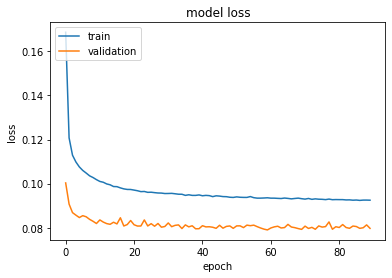

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 150)               2550      
_________________________________________________________________
dense_5 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_6 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_7 (Dense)              (None, 150)               22650     
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 3)                

2022-03-04 21:08:03.070851: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-04 21:08:03.070934: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


 97/292 [========>.....................] - ETA: 0s - loss: 0.2911 - accuracy: 0.6122

2022-03-04 21:08:03.289906: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-04 21:08:03.306005: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-04 21:08:03.306274: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-04 21:08:03.307191: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_04_21_08_03
2022-03-04 21:08:03.307683: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_04_21_08_03/vw.trace.json.gz
2022-03-04 21:08:03.307751: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-04 21:08:03.308399: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

292/292 [==============================] - 1s 2ms/step - loss: 0.1885 - accuracy: 0.7344 - val_loss: 0.0908 - val_accuracy: 0.8620
Epoch 2/100
292/292 [==============================] - 0s 2ms/step - loss: 0.1101 - accuracy: 0.8518 - val_loss: 0.0795 - val_accuracy: 0.8649
Epoch 3/100
292/292 [==============================] - 0s 2ms/step - loss: 0.0976 - accuracy: 0.8635 - val_loss: 0.0738 - val_accuracy: 0.8769
Epoch 4/100
292/292 [==============================] - 0s 2ms/step - loss: 0.0907 - accuracy: 0.8697 - val_loss: 0.0714 - val_accuracy: 0.8823
Epoch 5/100
292/292 [==============================] - 0s 2ms/step - loss: 0.0869 - accuracy: 0.8730 - val_loss: 0.0696 - val_accuracy: 0.8835
Epoch 6/100
292/292 [==============================] - 0s 2ms/step - loss: 0.0844 - accuracy: 0.8766 - val_loss: 0.0671 - val_accuracy: 0.8830
Epoch 7/100
292/292 [==============================] - 0s 2ms/step - loss: 0.0829 - accuracy: 0.8788 - val_loss: 0.0672 - val_accuracy: 0.8823
Epoch 8/100

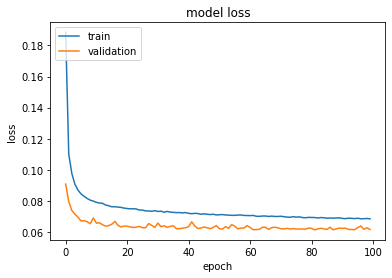

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 26)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 150)               4050      
_________________________________________________________________
dense_9 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_10 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_11 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_2 (Dropout)          (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 3)                

2022-03-04 21:08:45.056281: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-04 21:08:45.056367: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


 93/292 [========>.....................] - ETA: 0s - loss: 0.2082 - accuracy: 0.6220

2022-03-04 21:08:45.282232: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-04 21:08:45.298566: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-04 21:08:45.298870: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-04 21:08:45.300347: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_04_21_08_45
2022-03-04 21:08:45.300870: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_04_21_08_45/vw.trace.json.gz
2022-03-04 21:08:45.300941: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-04 21:08:45.301601: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

292/292 [==============================] - 1s 2ms/step - loss: 0.1528 - accuracy: 0.7684 - val_loss: 0.0871 - val_accuracy: 0.8780
Epoch 2/100
292/292 [==============================] - 0s 2ms/step - loss: 0.1093 - accuracy: 0.8666 - val_loss: 0.0830 - val_accuracy: 0.8630
Epoch 3/100
292/292 [==============================] - 0s 2ms/step - loss: 0.0957 - accuracy: 0.8750 - val_loss: 0.0702 - val_accuracy: 0.8949
Epoch 4/100
292/292 [==============================] - 0s 2ms/step - loss: 0.0862 - accuracy: 0.8823 - val_loss: 0.0662 - val_accuracy: 0.8979
Epoch 5/100
292/292 [==============================] - 0s 2ms/step - loss: 0.0802 - accuracy: 0.8888 - val_loss: 0.0636 - val_accuracy: 0.8913
Epoch 6/100
292/292 [==============================] - 0s 2ms/step - loss: 0.0766 - accuracy: 0.8928 - val_loss: 0.0629 - val_accuracy: 0.9070
Epoch 7/100
292/292 [==============================] - 0s 2ms/step - loss: 0.0741 - accuracy: 0.8965 - val_loss: 0.0595 - val_accuracy: 0.9075
Epoch 8/100

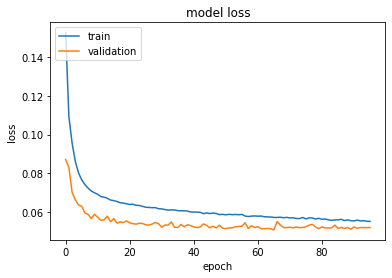

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 36)]              0         
_________________________________________________________________
dense_12 (Dense)             (None, 150)               5550      
_________________________________________________________________
dense_13 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_14 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_15 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_3 (Dropout)          (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 3)                

2022-03-04 21:09:26.366433: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-04 21:09:26.366586: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


131/292 [============>.................] - ETA: 0s - loss: 0.1675 - accuracy: 0.6984

2022-03-04 21:09:26.598344: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-04 21:09:26.613888: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-04 21:09:26.614171: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-04 21:09:26.615114: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_04_21_09_26
2022-03-04 21:09:26.615606: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_04_21_09_26/vw.trace.json.gz
2022-03-04 21:09:26.615673: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-04 21:09:26.616325: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

292/292 [==============================] - 1s 2ms/step - loss: 0.1427 - accuracy: 0.7790 - val_loss: 0.0866 - val_accuracy: 0.8888
Epoch 2/100
292/292 [==============================] - 1s 2ms/step - loss: 0.1083 - accuracy: 0.8671 - val_loss: 0.0765 - val_accuracy: 0.8972
Epoch 3/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0960 - accuracy: 0.8795 - val_loss: 0.0694 - val_accuracy: 0.9038
Epoch 4/100
292/292 [==============================] - 0s 2ms/step - loss: 0.0863 - accuracy: 0.8858 - val_loss: 0.0686 - val_accuracy: 0.8978
Epoch 5/100
292/292 [==============================] - 0s 2ms/step - loss: 0.0795 - accuracy: 0.8905 - val_loss: 0.0702 - val_accuracy: 0.9071
Epoch 6/100
292/292 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.8959 - val_loss: 0.0591 - val_accuracy: 0.9174
Epoch 7/100
292/292 [==============================] - 0s 2ms/step - loss: 0.0725 - accuracy: 0.9008 - val_loss: 0.0577 - val_accuracy: 0.9170
Epoch 8/100

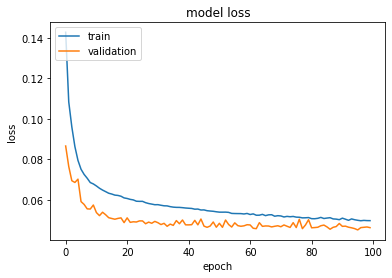

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 46)]              0         
_________________________________________________________________
dense_16 (Dense)             (None, 150)               7050      
_________________________________________________________________
dense_17 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_18 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_19 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_4 (Dropout)          (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 3)                

2022-03-04 21:10:15.139377: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-04 21:10:15.139520: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


 88/292 [========>.....................] - ETA: 0s - loss: 0.2107 - accuracy: 0.5540

2022-03-04 21:10:15.402805: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-04 21:10:15.418028: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-04 21:10:15.418309: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-04 21:10:15.419277: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_04_21_10_15
2022-03-04 21:10:15.419806: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_04_21_10_15/vw.trace.json.gz
2022-03-04 21:10:15.419877: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-04 21:10:15.420587: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

292/292 [==============================] - 1s 2ms/step - loss: 0.1528 - accuracy: 0.7496 - val_loss: 0.0832 - val_accuracy: 0.8750
Epoch 2/100
292/292 [==============================] - 1s 2ms/step - loss: 0.1085 - accuracy: 0.8698 - val_loss: 0.0766 - val_accuracy: 0.9054
Epoch 3/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0959 - accuracy: 0.8826 - val_loss: 0.0680 - val_accuracy: 0.8959
Epoch 4/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0862 - accuracy: 0.8901 - val_loss: 0.0665 - val_accuracy: 0.9096
Epoch 5/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0789 - accuracy: 0.8960 - val_loss: 0.0593 - val_accuracy: 0.9156
Epoch 6/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0746 - accuracy: 0.9018 - val_loss: 0.0565 - val_accuracy: 0.9163
Epoch 7/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0711 - accuracy: 0.9056 - val_loss: 0.0588 - val_accuracy: 0.9218
Epoch 8/100

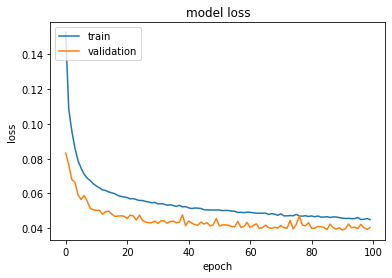

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 56)]              0         
_________________________________________________________________
dense_20 (Dense)             (None, 150)               8550      
_________________________________________________________________
dense_21 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_22 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_23 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_5 (Dropout)          (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 3)               

2022-03-04 21:11:04.780185: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-04 21:11:04.780274: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


 21/292 [=>............................] - ETA: 2s - loss: 0.3463 - accuracy: 0.3192

2022-03-04 21:11:05.041429: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-04 21:11:05.059401: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-04 21:11:05.059829: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-04 21:11:05.061176: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_04_21_11_05
2022-03-04 21:11:05.061844: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_04_21_11_05/vw.trace.json.gz
2022-03-04 21:11:05.061950: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-04 21:11:05.062925: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

292/292 [==============================] - 1s 3ms/step - loss: 0.1569 - accuracy: 0.7666 - val_loss: 0.0853 - val_accuracy: 0.8913
Epoch 2/100
292/292 [==============================] - 1s 2ms/step - loss: 0.1100 - accuracy: 0.8690 - val_loss: 0.0777 - val_accuracy: 0.8984
Epoch 3/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0963 - accuracy: 0.8805 - val_loss: 0.0713 - val_accuracy: 0.8960
Epoch 4/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0856 - accuracy: 0.8892 - val_loss: 0.0624 - val_accuracy: 0.9160
Epoch 5/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0775 - accuracy: 0.8978 - val_loss: 0.0575 - val_accuracy: 0.9222
Epoch 6/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0724 - accuracy: 0.9037 - val_loss: 0.0552 - val_accuracy: 0.9246
Epoch 7/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0689 - accuracy: 0.9100 - val_loss: 0.0528 - val_accuracy: 0.9297
Epoch 8/100

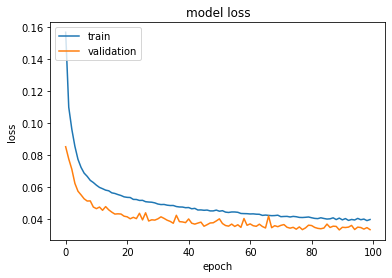

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 66)]              0         
_________________________________________________________________
dense_24 (Dense)             (None, 150)               10050     
_________________________________________________________________
dense_25 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_26 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_27 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_6 (Dropout)          (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 3)               

2022-03-04 21:11:56.072520: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-04 21:11:56.072662: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


 93/292 [========>.....................] - ETA: 0s - loss: 0.2160 - accuracy: 0.6129

2022-03-04 21:11:56.339575: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-04 21:11:56.356417: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-04 21:11:56.356707: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-04 21:11:56.357715: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_04_21_11_56
2022-03-04 21:11:56.358246: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_04_21_11_56/vw.trace.json.gz
2022-03-04 21:11:56.358323: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-04 21:11:56.359046: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

292/292 [==============================] - 1s 2ms/step - loss: 0.1544 - accuracy: 0.7668 - val_loss: 0.0846 - val_accuracy: 0.8913
Epoch 2/100
292/292 [==============================] - 1s 2ms/step - loss: 0.1068 - accuracy: 0.8724 - val_loss: 0.0745 - val_accuracy: 0.9046
Epoch 3/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0919 - accuracy: 0.8854 - val_loss: 0.0685 - val_accuracy: 0.9059
Epoch 4/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0812 - accuracy: 0.8931 - val_loss: 0.0598 - val_accuracy: 0.9064
Epoch 5/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0748 - accuracy: 0.9012 - val_loss: 0.0547 - val_accuracy: 0.9211
Epoch 6/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0707 - accuracy: 0.9068 - val_loss: 0.0512 - val_accuracy: 0.9259
Epoch 7/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0675 - accuracy: 0.9125 - val_loss: 0.0486 - val_accuracy: 0.9266
Epoch 8/100

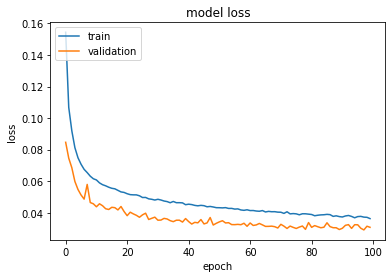

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 76)]              0         
_________________________________________________________________
dense_28 (Dense)             (None, 150)               11550     
_________________________________________________________________
dense_29 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_30 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_31 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_7 (Dropout)          (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 3)               

2022-03-04 21:12:47.731074: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-04 21:12:47.731159: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


 93/292 [========>.....................] - ETA: 0s - loss: 0.2042 - accuracy: 0.6616

2022-03-04 21:12:48.000979: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-04 21:12:48.016317: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-04 21:12:48.016608: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-04 21:12:48.017532: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_04_21_12_48
2022-03-04 21:12:48.018051: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_04_21_12_48/vw.trace.json.gz
2022-03-04 21:12:48.018119: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-04 21:12:48.018805: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

292/292 [==============================] - 1s 2ms/step - loss: 0.1502 - accuracy: 0.7827 - val_loss: 0.0841 - val_accuracy: 0.8809
Epoch 2/100
292/292 [==============================] - 1s 2ms/step - loss: 0.1086 - accuracy: 0.8718 - val_loss: 0.0755 - val_accuracy: 0.9035
Epoch 3/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0962 - accuracy: 0.8837 - val_loss: 0.0683 - val_accuracy: 0.8955
Epoch 4/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0850 - accuracy: 0.8909 - val_loss: 0.0609 - val_accuracy: 0.9107
Epoch 5/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0766 - accuracy: 0.8991 - val_loss: 0.0568 - val_accuracy: 0.9211
Epoch 6/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0714 - accuracy: 0.9063 - val_loss: 0.0549 - val_accuracy: 0.9086
Epoch 7/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0675 - accuracy: 0.9116 - val_loss: 0.0543 - val_accuracy: 0.9246
Epoch 8/100

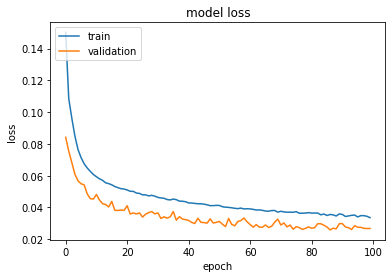

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 86)]              0         
_________________________________________________________________
dense_32 (Dense)             (None, 150)               13050     
_________________________________________________________________
dense_33 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_34 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_35 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_8 (Dropout)          (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 3)               

2022-03-04 21:13:39.336998: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-04 21:13:39.337131: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


 95/292 [========>.....................] - ETA: 0s - loss: 0.1933 - accuracy: 0.6159

2022-03-04 21:13:39.594955: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-04 21:13:39.610476: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-04 21:13:39.610746: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-04 21:13:39.612098: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_04_21_13_39
2022-03-04 21:13:39.612693: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_04_21_13_39/vw.trace.json.gz
2022-03-04 21:13:39.612786: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-04 21:13:39.613509: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

292/292 [==============================] - 1s 2ms/step - loss: 0.1453 - accuracy: 0.7726 - val_loss: 0.0824 - val_accuracy: 0.8760
Epoch 2/100
292/292 [==============================] - 1s 2ms/step - loss: 0.1052 - accuracy: 0.8726 - val_loss: 0.0723 - val_accuracy: 0.9016
Epoch 3/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0916 - accuracy: 0.8850 - val_loss: 0.0647 - val_accuracy: 0.8953
Epoch 4/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0813 - accuracy: 0.8950 - val_loss: 0.0590 - val_accuracy: 0.9104
Epoch 5/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0740 - accuracy: 0.9024 - val_loss: 0.0543 - val_accuracy: 0.9206
Epoch 6/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0693 - accuracy: 0.9091 - val_loss: 0.0525 - val_accuracy: 0.9253
Epoch 7/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0663 - accuracy: 0.9157 - val_loss: 0.0490 - val_accuracy: 0.9269
Epoch 8/100

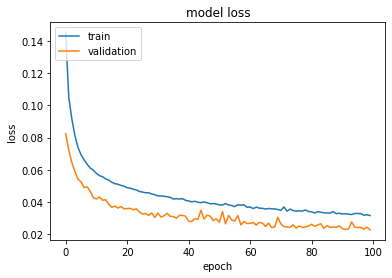

Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_36 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_37 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_38 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_39 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_9 (Dropout)          (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 3)               

2022-03-04 21:14:31.143671: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-04 21:14:31.143805: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


 94/292 [========>.....................] - ETA: 0s - loss: 0.1825 - accuracy: 0.6737

2022-03-04 21:14:31.413347: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-04 21:14:31.428424: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-04 21:14:31.428706: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-04 21:14:31.429663: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_04_21_14_31
2022-03-04 21:14:31.430189: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_04_21_14_31/vw.trace.json.gz
2022-03-04 21:14:31.430262: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-04 21:14:31.430957: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

292/292 [==============================] - 1s 2ms/step - loss: 0.1441 - accuracy: 0.7891 - val_loss: 0.0832 - val_accuracy: 0.8921
Epoch 2/100
292/292 [==============================] - 1s 2ms/step - loss: 0.1070 - accuracy: 0.8718 - val_loss: 0.0736 - val_accuracy: 0.9043
Epoch 3/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0925 - accuracy: 0.8851 - val_loss: 0.0670 - val_accuracy: 0.9117
Epoch 4/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0817 - accuracy: 0.8929 - val_loss: 0.0597 - val_accuracy: 0.9156
Epoch 5/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0743 - accuracy: 0.9023 - val_loss: 0.0542 - val_accuracy: 0.9241
Epoch 6/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0696 - accuracy: 0.9102 - val_loss: 0.0511 - val_accuracy: 0.9253
Epoch 7/100
292/292 [==============================] - 1s 2ms/step - loss: 0.0658 - accuracy: 0.9157 - val_loss: 0.0471 - val_accuracy: 0.9286
Epoch 8/100

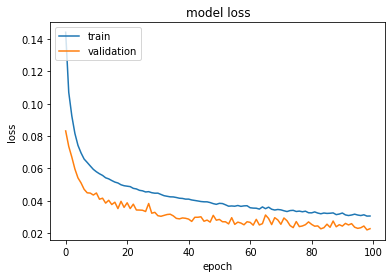

In [10]:
"""
Train the ANN network
Fix the number of hidden layers: 4
Vary the number of DWI used: [6, 16, 26, ..., 86, 96]
"""
dwis = np.arange(start=6, stop=97, step=10)
for dwi in dwis:
    cmd = "--train_subjects s01_still --DWI " + str(dwi) + " --model fc1d --layer 4 --train --label_type A"
    plot_loss(cmd)

In [11]:
"""
Test each network with varied number of DWI
"""
dwis = np.arange(start=6, stop=97, step=10)
for dwi in dwis:
    cmd = "--test_subjects s02_still --DWI " + str(dwi) + " --model fc1d --layer 4 --label_type A"
    args = model_parser().parse_args(cmd.split())
    test_model(args)

(84, 84, 50, 6)
tdata shape: (84, 84, 50, 6)
Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 6)]               0         
_________________________________________________________________
dense_40 (Dense)             (None, 150)               1050      
_________________________________________________________________
dense_41 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_42 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_43 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_10 (Dropout)         (None, 150)               0         
_________________________________________________________________
output (

/home/vw/anaconda3/envs/project/lib/python3.7/site-packages/nipy/io/files.py:145: FutureWarning: Default `strict` currently False; this will change to True in a future version of nipy
  ni_img = nipy2nifti(img, data_dtype = io_dtype)


(84, 84, 50, 3)
0.08475440435483028
(84, 84, 50, 26)
tdata shape: (84, 84, 50, 26)
Model: "functional_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 26)]              0         
_________________________________________________________________
dense_48 (Dense)             (None, 150)               4050      
_________________________________________________________________
dense_49 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_50 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_51 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_12 (Dropout)         (None, 150)               0         
____________________________________

DWI=6 NDI loss: 0.12842717513765006-ODI loss: 0.1145272165955928-FWF loss: 0.07258727779920068-Overall loss: 0.10518055651081452
DWI=16 NDI loss: 0.1034358441986291-ODI loss: 0.08607781691459657-FWF loss: 0.058664833953232576-Overall loss: 0.08272616502215274
DWI=26 NDI loss: 0.09157696627062915-ODI loss: 0.0742030299609558-FWF loss: 0.04532552609624904-Overall loss: 0.07036850744261133
DWI=36 NDI loss: 0.08886388332017484-ODI loss: 0.06779899558091235-FWF loss: 0.0391490033052107-Overall loss: 0.0652706274020993
DWI=46 NDI loss: 0.07718375733028564-ODI loss: 0.06311965666265532-FWF loss: 0.035211274311695066-Overall loss: 0.058504896101545335
DWI=56 NDI loss: 0.07252769273543995-ODI loss: 0.05637746259626999-FWF loss: 0.028152613720590653-Overall loss: 0.0523525896841002


/home/vw/anaconda3/envs/project/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


DWI=66 NDI loss: 0.08018879040010005-ODI loss: 0.05395929766005284-FWF loss: 0.02316915504442501-Overall loss: 0.0524390810348593
DWI=76 NDI loss: 0.06697438681652165-ODI loss: 0.05058811518470529-FWF loss: 0.020027058839664498-Overall loss: 0.04586318694696381
DWI=86 NDI loss: 0.0627623095799877-ODI loss: 0.046286240826524556-FWF loss: 0.017325388108089698-Overall loss: 0.04212464617153399
DWI=96 NDI loss: 0.060492391148567165-ODI loss: 0.04535013596067175-FWF loss: 0.015557643565916759-Overall loss: 0.04046672355838522


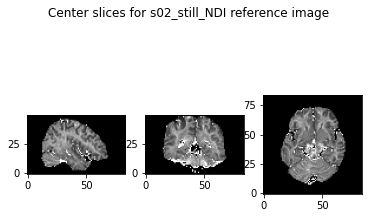

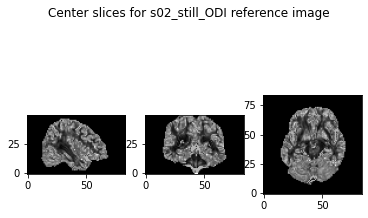

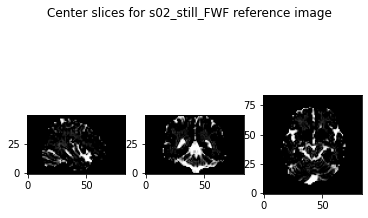

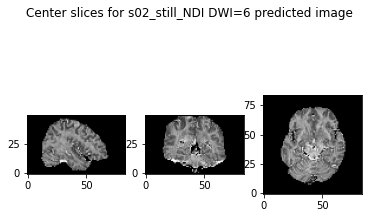

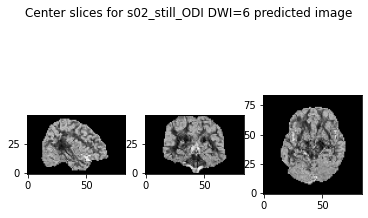

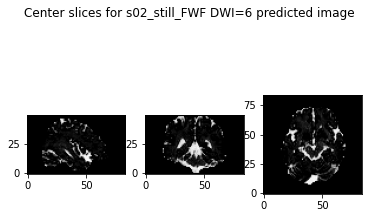

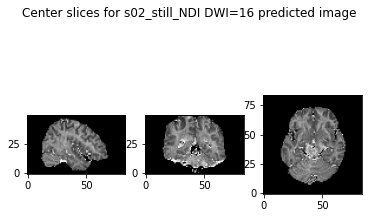

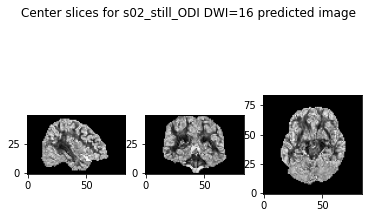

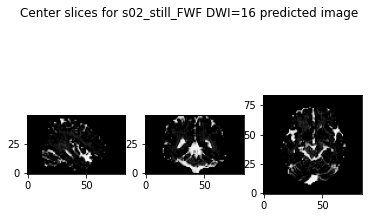

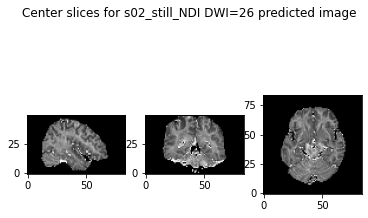

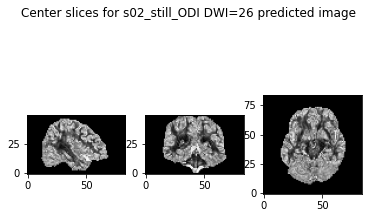

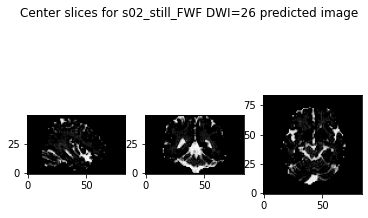

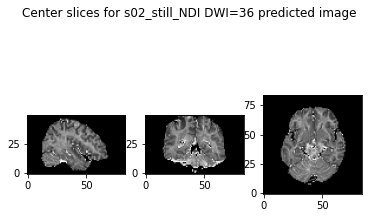

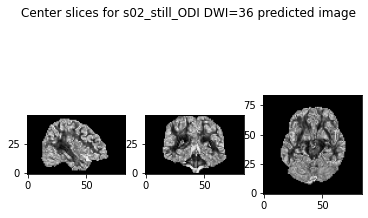

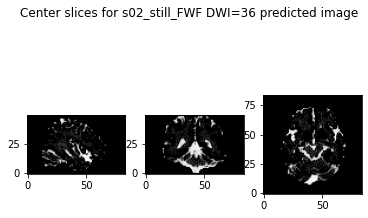

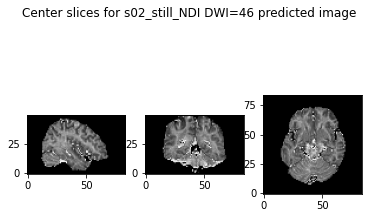

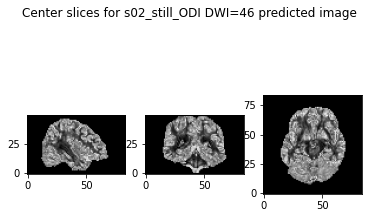

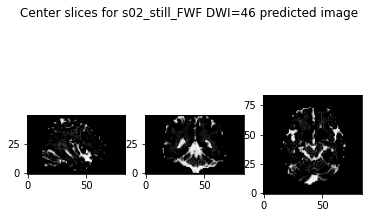

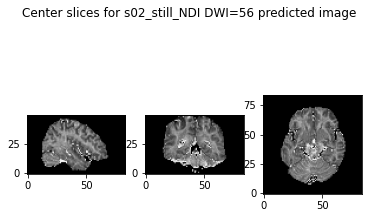

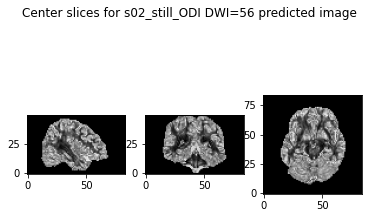

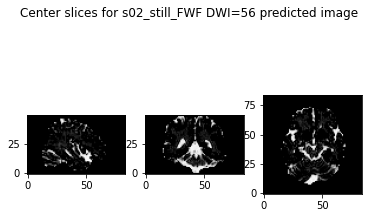

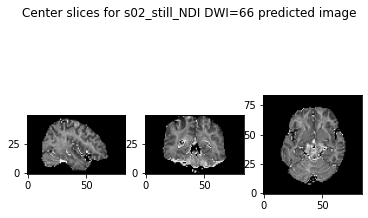

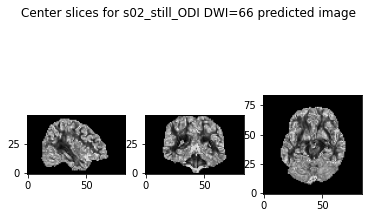

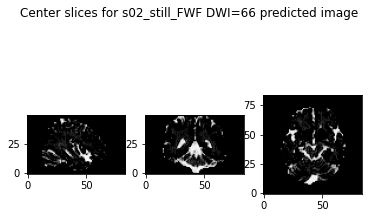

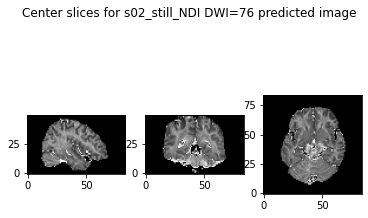

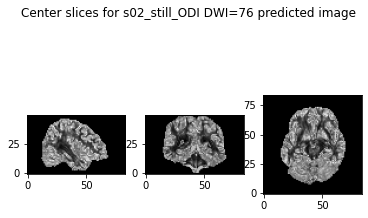

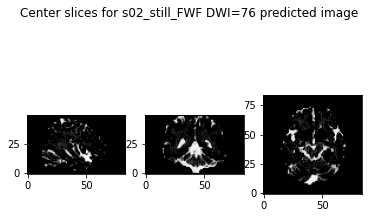

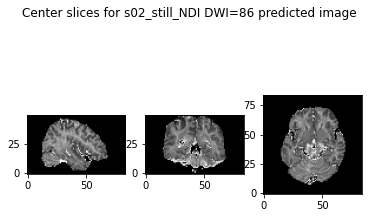

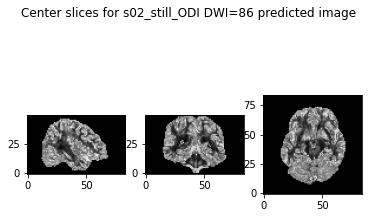

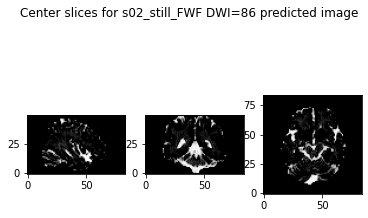

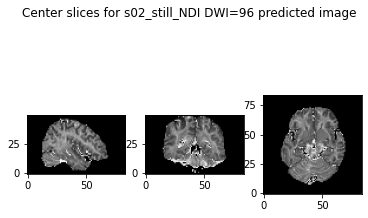

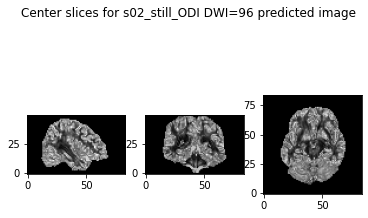

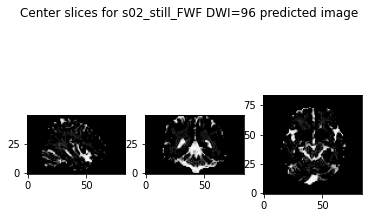

In [20]:
"""
Render each img produced.
Compare with the reference img.
Using nib to fetch the  data, used for evaluation
"""
# the path of reference imgs
s02_NDI_path = '../Data-NODDI/s02_still/s02_still_NDI.nii'
s02_ODI_path = '../Data-NODDI/s02_still/s02_still_ODI.nii'
s02_FWF_path = '../Data-NODDI/s02_still/s02_still_FWF.nii'
s02_mask_path = '../Net-DTI/datasets/mask/mask_s02_still.nii'
# the data of reference imgs
s02_NDI_img = nib.load(s02_NDI_path)
s02_NDI_img_data = s02_NDI_img.get_fdata()
s02_ODI_img = nib.load(s02_ODI_path)
s02_ODI_img_data = s02_ODI_img.get_fdata()
s02_FWF_img = nib.load(s02_FWF_path)
s02_FWF_img_data = s02_FWF_img.get_fdata()
s02_mask_img = nib.load(s02_mask_path)
s02_mask_img_data = s02_mask_img.get_fdata()
# the label types and the imgs
ltype = ['NDI', 'ODI', 'FWF']
ref_imgs = [s02_NDI_img_data, s02_ODI_img_data, s02_FWF_img_data]
# visualise the ref img
for i in range(len(ltype)):
    ref_slice_0 = ref_imgs[i][26, :, :]
    ref_slice_1 = ref_imgs[i][:, 30, :]
    ref_slice_2 = ref_imgs[i][:, :, 16]
    show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
    plt.suptitle("Center slices for s02_still_"+ltype[i]+" reference image")

dwis = np.arange(start=6, stop=97, step=10)
for dwi in dwis:
    # pred img paths
    pred_NDI_path = '../Net-DTI/nii/s02_still-NDI-'+str(dwi)+'-first-fc1d-4layer.nii'
    pred_ODI_path = '../Net-DTI/nii/s02_still-ODI-'+str(dwi)+'-first-fc1d-4layer.nii'
    pred_FWF_path = '../Net-DTI/nii/s02_still-FWF-'+str(dwi)+'-first-fc1d-4layer.nii'
    # load the pred imgs data
    pred_NDI = nib.load(pred_NDI_path)
    pred_NDI_data = pred_NDI.get_fdata()
    pred_ODI = nib.load(pred_ODI_path)
    pred_ODI_data = pred_ODI.get_fdata()
    pred_FWF = nib.load(pred_FWF_path)
    pred_FWF_data = pred_FWF.get_fdata()
    # visualise these imgs
    pred_imgs = [pred_NDI_data, pred_ODI_data, pred_FWF_data]
    for i in range(len(ltype)):
        pred_slice_0 = pred_imgs[i][26, :, :]
        pred_slice_1 = pred_imgs[i][:, 30, :]
        pred_slice_2 = pred_imgs[i][:, :, 16]
        show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
        plt.suptitle("Center slices for s02_still_"+ltype[i]+" DWI="+str(dwi)+" predicted image")
    
    # evaluate the model
    NDI_loss = evaluate_model(pred_NDI_data, s02_NDI_img_data, s02_mask_img_data)[0]
    ODI_loss = evaluate_model(pred_ODI_data, s02_ODI_img_data, s02_mask_img_data)[0]
    FWF_loss = evaluate_model(pred_FWF_data, s02_FWF_img_data, s02_mask_img_data)[0]
    print("DWI="+str(dwi)+" NDI loss: " +str(NDI_loss)+"-"+"ODI loss: "+str(ODI_loss)+"-"+"FWF loss: "+str(FWF_loss)+"-"+"Overall loss: "+str(np.mean([NDI_loss,ODI_loss,FWF_loss])))
